# Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# Hypothesis Generation

### Store Level Hypotheses:
* City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
* Population Density: Stores located in densely populated areas should have higher sales because of more demand.
* Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
* Competitors: Stores having similar establishments nearby should have less sales because of more competition.
* Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
* Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
* Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
* Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

### Product Level Hypotheses:
* Brand: Branded products should have higher sales because of higher trust in the customer.
* Packaging: Products with good packaging can attract customers and sell more.
* Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
* Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
* Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
* Advertising: Better advertising of products in the store will should higher sales in most cases.
* Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

# Loading Packages and Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error,make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

In [2]:
train_df=pd.read_csv('Train.csv')
test_df=pd.read_csv('Test.csv')

In [3]:
train_df['source']='train'
test_df['source']='test'
df = pd.concat([train_df,test_df],ignore_index=True)
print(' Shape of train data',train_df.shape,'\n','Shape of test data',test_df.shape,'\n','Shape of combined data',df.shape)

 Shape of train data (8523, 13) 
 Shape of test data (5681, 12) 
 Shape of combined data (14204, 13)


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [5]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


# Data Structure and Content

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  source                     5681 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 532.7+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [9]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [10]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [12]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [13]:
df.shape

(14204, 13)

### We have 2439 missing values in column Item_Weight and 4061 in Outlet Size. The 5681 missing values in Item_Outlet_Sales is coming from the test dataset, which is not an issue.

# Exploratory Data Analysis

### This dataset contains 8523 observations and 12 features. 

### The features of the dataset are defined as follows :
* Item_Identifier - Unique ID Product
* Item_Weight - Weight of Product
* Item_Fat_Content - Whether the product is low fat or not
* Item_Visibility - % of total display area in store allocated to this product
* Item_Type - Category to which product belongs
* Item_MRP - MRP of the product
* Outlet_Identifier - Unique store ID
* Outlet_Establishment_Year - Year in which store was established
* Outlet_Size - Size of the store
* Outlet_Location_Type - Type of city in which the store is located
* Outlet_Type - Grocery store or some sort of supermarket
* Item_Outlet_Sales - Sales of the product in particular store (Predictor Variable or Response Variable)

In [14]:
print('Frequency of Categories for Item_Identifier')
df.Item_Identifier.value_counts()

Frequency of Categories for Item_Identifier


FDC47    10
FDF52    10
FDP21    10
FDR13    10
FDE02    10
         ..
DRN11     7
NCW54     7
FDR51     7
FDL50     7
FDI46     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [15]:
print('Frequency of Categories for Item_Weight')
df.Item_Weight.value_counts()

Frequency of Categories for Item_Weight


17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
5.210       7
7.960       7
4.615       6
9.035       6
7.850       6
Name: Item_Weight, Length: 415, dtype: int64

In [16]:
print('Frequency of Categories for Item_Fat_Content')
df.Item_Fat_Content.value_counts()

Frequency of Categories for Item_Fat_Content


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

### There are typos and difference in representation in categories of Item_Fat_Content variable. Some of ‘Low Fat’ values are mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’. We will handle this in further steps.

In [17]:
print('Frequency of Categories for Item_Visibility')
df.Item_Visibility.value_counts()

Frequency of Categories for Item_Visibility


0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [18]:
print('Frequency of Categories for Item_Type')
df.Item_Type.value_counts()

Frequency of Categories for Item_Type


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [19]:
print('Frequency of Categories for Outlet_Establishment_Year')
df.Outlet_Establishment_Year.value_counts()

Frequency of Categories for Outlet_Establishment_Year


1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [20]:
print('Frequency of Categories for Outlet_Identifier')
df.Outlet_Identifier.value_counts()

Frequency of Categories for Outlet_Identifier


OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [21]:
print('Frequency of Categories for Outlet_Size')
df.Outlet_Size.value_counts()

Frequency of Categories for Outlet_Size


Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [22]:
print('Frequency of Categories for Outlet_Establishment_Year')
df.Outlet_Establishment_Year.value_counts()

Frequency of Categories for Outlet_Establishment_Year


1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [23]:
print('Frequency of Categories for Outlet_Location_Type')
df.Outlet_Location_Type.value_counts()

Frequency of Categories for Outlet_Location_Type


Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [24]:
print('Frequency of Categories for Outlet_Type')
df.Outlet_Type.value_counts()

Frequency of Categories for Outlet_Type


Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

# Univariate Analysis

Text(0.5, 1.0, 'Different Sizes of Outlets')

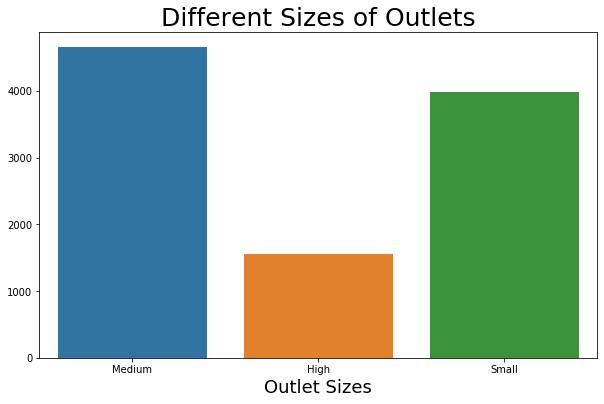

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Size',data=df)
plt.xlabel('Outlet Sizes',fontsize=18)
plt.ylabel(None)
plt.title('Different Sizes of Outlets',fontsize=25)

Text(0.5, 1.0, 'Different Locations of Outlets')

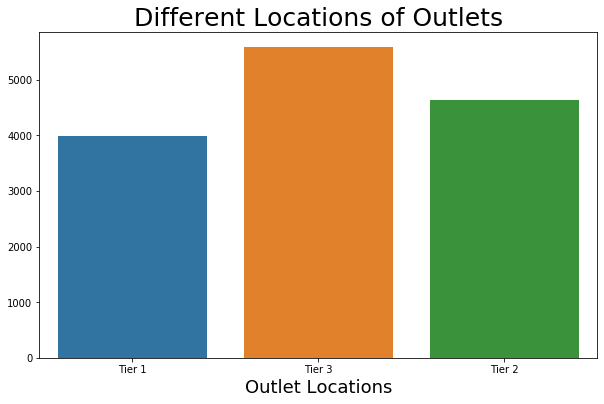

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Location_Type',data=df)
plt.xlabel('Outlet Locations',fontsize=18)
plt.ylabel(None)
plt.title('Different Locations of Outlets',fontsize=25)

Text(0.5, 1.0, 'Fat Content of Items')

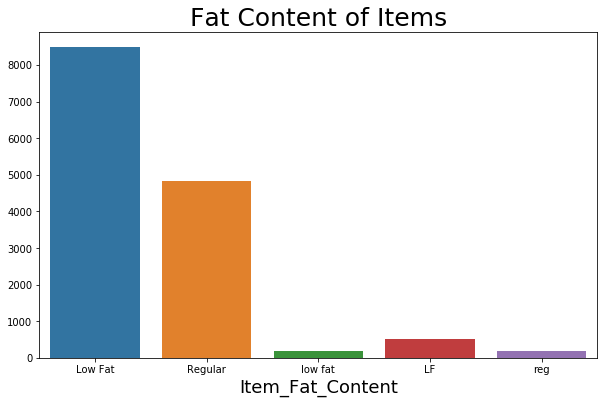

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Item_Fat_Content',data=df)
plt.xlabel('Item_Fat_Content',fontsize=18)
plt.ylabel(None)
plt.title('Fat Content of Items',fontsize=25)

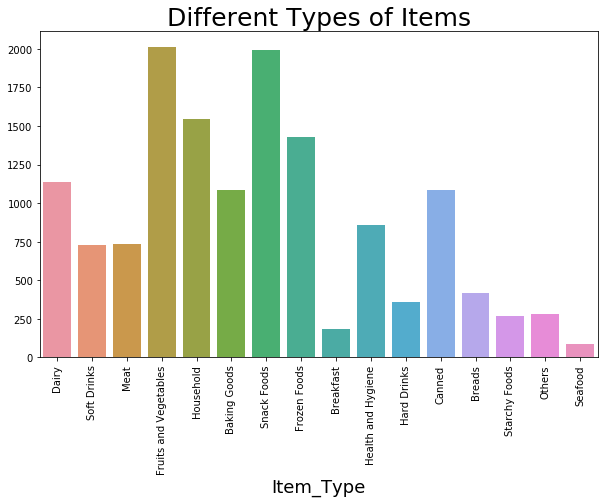

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(df.Item_Type)
plt.xticks(rotation=90)
plt.xlabel('Item_Type',fontsize=18)
plt.ylabel(None)
plt.title('Different Types of Items',fontsize=25);

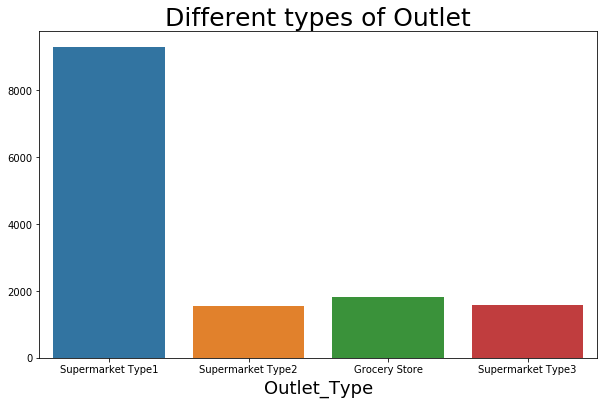

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Type',data=df)
plt.xlabel('Outlet_Type',fontsize=18)
plt.ylabel(None)
plt.title('Different types of Outlet',fontsize=25);

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

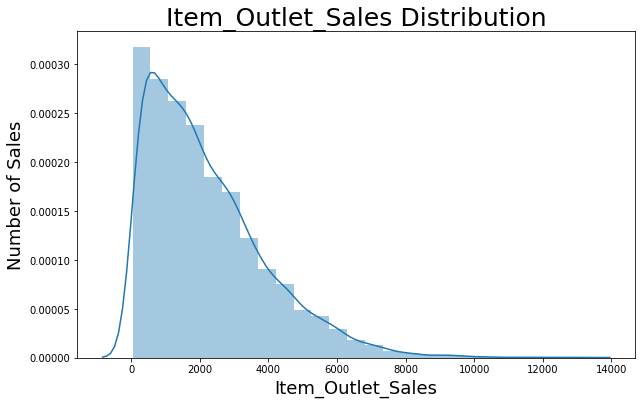

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(df.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales",fontsize=18)
plt.ylabel("Number of Sales",fontsize=18)
plt.title("Item_Outlet_Sales Distribution",fontsize=25)

In [ ]:
print ('Skewness:', df.Item_Outlet_Sales.skew())
print('Kurtosis:', df.Item_Outlet_Sales.kurt())

### Skewness > 1 which indicates that the distribution of Item_Outlet_Sales is highly positively skewed whereas, kurtosis > 1 shows that the distribution is leptokurtic.

In [31]:
corr=df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


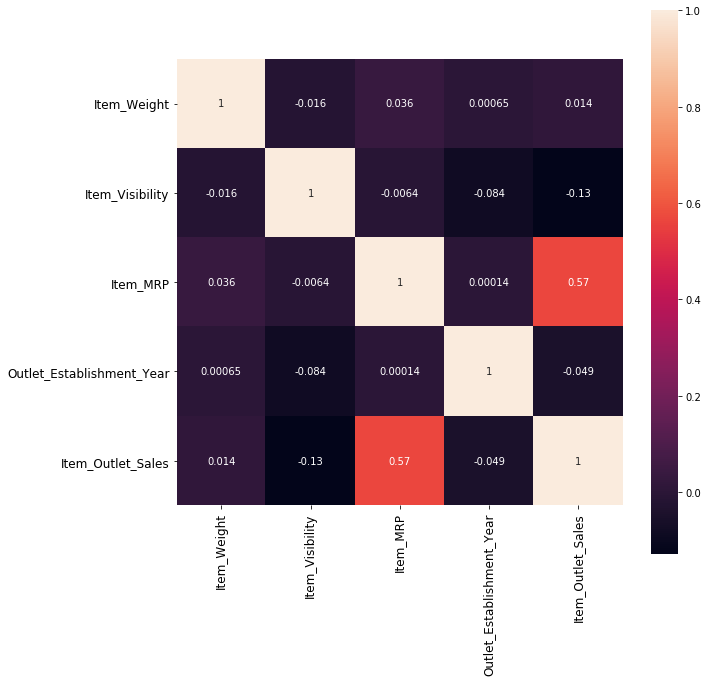

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True,square=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Item_Weight has almost negligible correlation (1.4%) with the target variable Item_Outlet_Sales.

#### Item_Visibility is having nearly zero correlation (-13%) with the target variable. This means that the sales are not affected by visibility of item which is a contradiction to the general assumption of “more visibility thus, more sales”.

#### Item_MRP is positively correlated with sales at an outlet, which indicates that the price quoted by an outlet plays an important factor in sales. Variation in MRP quoted by various outlets depends on their individual sales.

#### Outlets situated in location with type tier 2 and medium size are also having high sales, which means that a one-stop-shopping-center situated in a town or city with populated area can have high sales.

# Bivariate Analysis

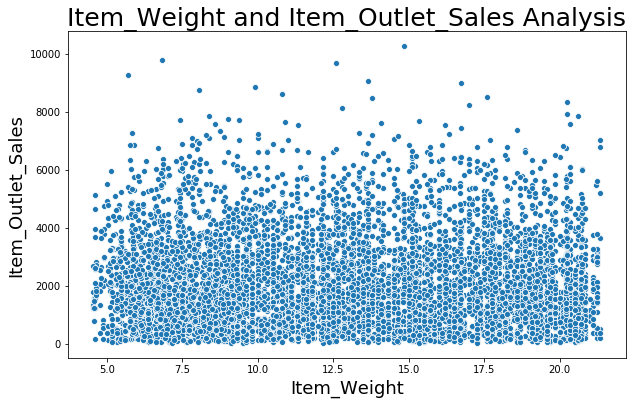

In [33]:
plt.figure(figsize=(10,6))
plt.xlabel("Item_Weight",fontsize=18)
plt.ylabel("Item_Outlet_Sales",fontsize=18)
plt.title("Item_Weight and Item_Outlet_Sales Analysis",fontsize=25)
sns.scatterplot(x=df["Item_Weight"] ,y=df["Item_Outlet_Sales"])

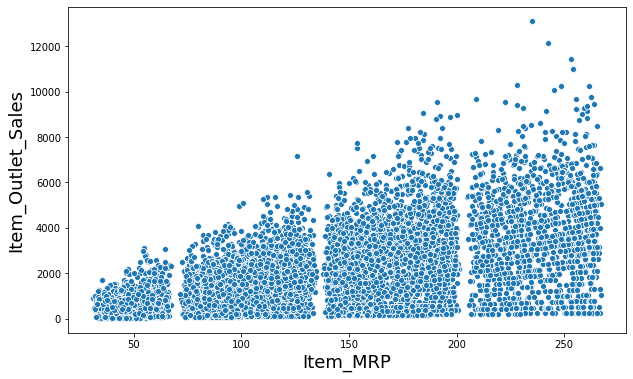

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['Item_MRP'], y = df['Item_Outlet_Sales'])
plt.xlabel('Item_MRP',fontsize=18)
plt.ylabel('Item_Outlet_Sales',fontsize=18);

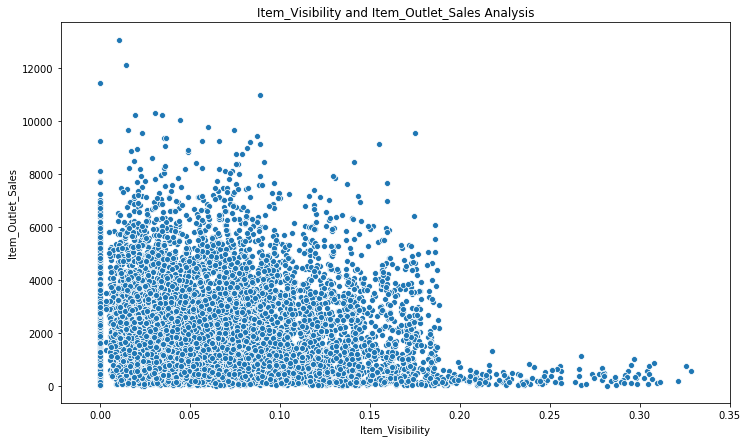

In [35]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
sns.scatterplot(x = df['Item_Visibility'], y = df['Item_Outlet_Sales'])

Text(0.5, 1.0, 'Impact of Item_Type on Item_Outlet_Sales ')

<Figure size 864x504 with 0 Axes>

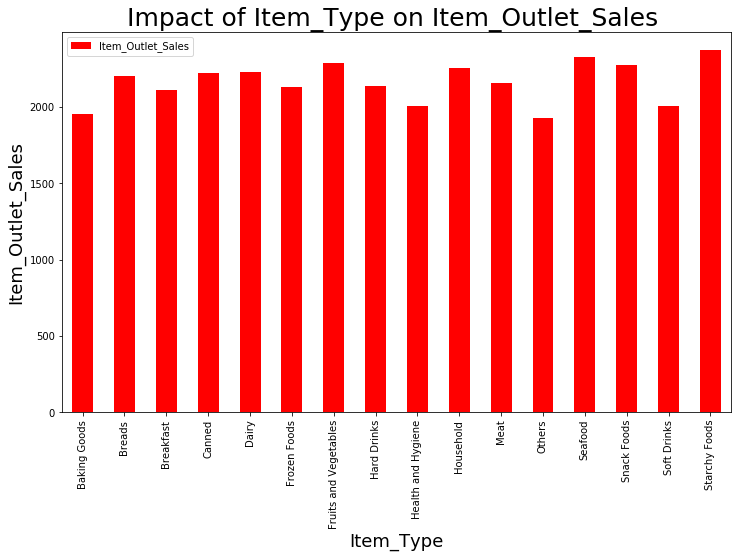

In [36]:
plt.figure(figsize=(12,7))
Item_Type_pivot = df.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)
Item_Type_pivot.plot(kind='bar', color='r',figsize=(12,7))
plt.xlabel("Item_Type",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Item_Outlet_Sales",fontsize=18)
plt.title("Impact of Item_Type on Item_Outlet_Sales ",fontsize=25)

<Figure size 864x504 with 0 Axes>

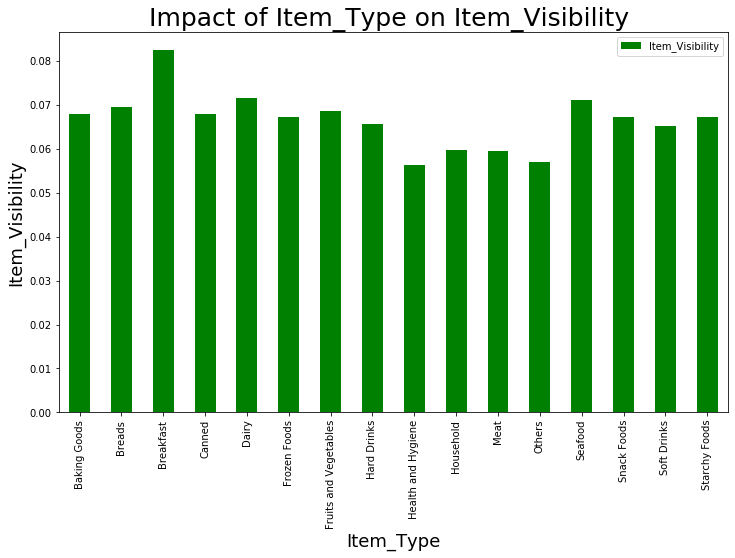

In [37]:
plt.figure(figsize=(12,7))
Item_Type_Visibility_pivot = df.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.mean)
Item_Type_Visibility_pivot.plot(kind='bar', color='g',figsize=(12,7))
plt.xlabel("Item_Type",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Item_Visibility",fontsize=18)
plt.title("Impact of Item_Type on Item_Visibility ",fontsize=25);

<Figure size 864x504 with 0 Axes>

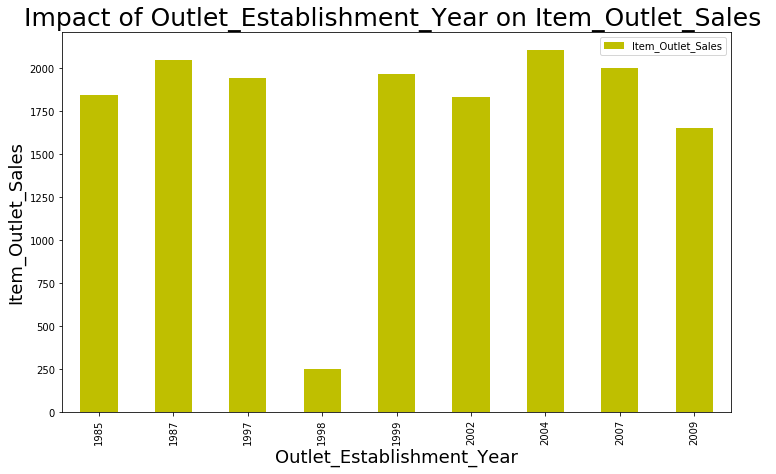

In [38]:
plt.figure(figsize=(12,7))
Item_Type_Visibility_pivot = df.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Type_Visibility_pivot.plot(kind='bar', color='y',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Item_Outlet_Sales",fontsize=18)
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales ",fontsize=25);

<Figure size 864x504 with 0 Axes>

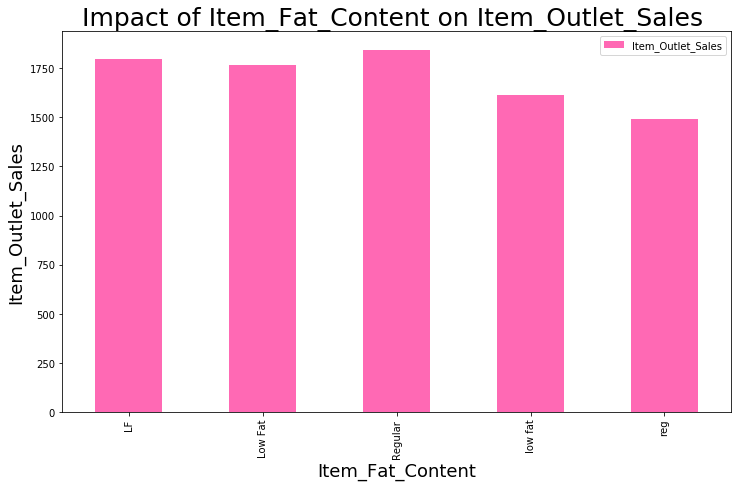

In [39]:
plt.figure(figsize=(12,7))
Item_Type_Visibility_pivot = df.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Type_Visibility_pivot.plot(kind='bar', color='hotpink',figsize=(12,7))
plt.xlabel("Item_Fat_Content",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Item_Outlet_Sales",fontsize=18)
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales ",fontsize=25);

<Figure size 864x504 with 0 Axes>

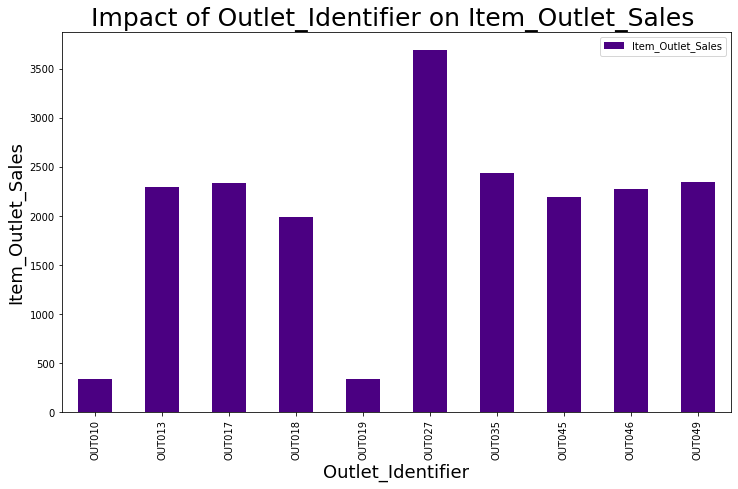

In [40]:
plt.figure(figsize=(12,7))
Item_Type_Visibility_pivot = df.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales")
Item_Type_Visibility_pivot.plot(kind='bar', color='indigo',figsize=(12,7))
plt.xlabel("Outlet_Identifier",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Item_Outlet_Sales",fontsize=18)
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales ",fontsize=25);

C:\Users\geeti\anaconda\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\geeti\anaconda\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


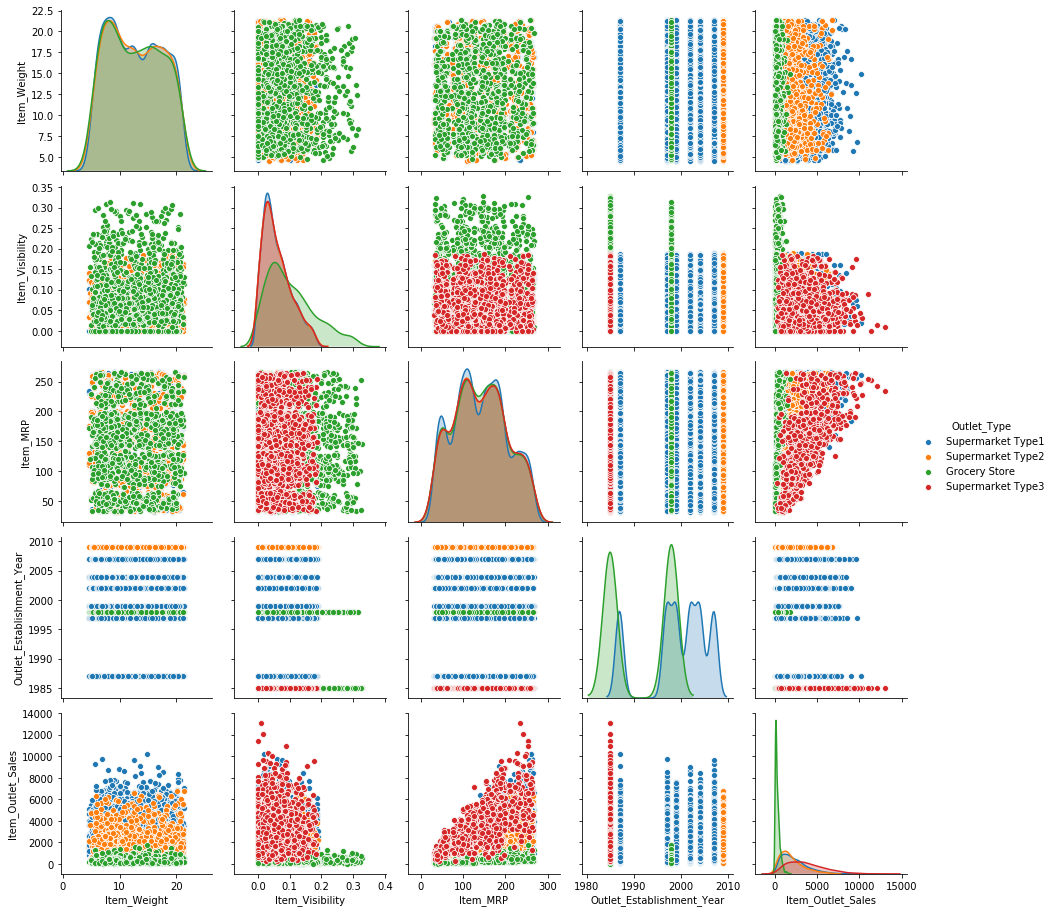

In [41]:
sns.pairplot(data = df,hue='Outlet_Type');

# Missing Value Treatment

### Imputing Item_Weight by the average weight of that particular item.

In [42]:
item_avg_weight = df.groupby(["Item_Identifier"])["Item_Weight"].mean()
item_avg_weight
miss_bool = df['Item_Weight'].isnull() 
print('Orignal #missing: %d'% sum(miss_bool))
df.loc[miss_bool,'Item_Weight'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])
print('Final #missing: %d'% sum(df['Item_Weight'].isnull()))    

Orignal #missing: 2439
Final #missing: 0


### Let's impute Outlet_Size with the mode of the Outlet_Size for that particular type of outlet.

In [43]:
from scipy.stats import mode
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))
print('Mode for each Outlet_Type:')
print(outlet_size_mode)
miss_bool = df['Outlet_Size'].isnull() 
print('\nOrignal #missing: %d'% sum(miss_bool))
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print('\nFinal #missing: %d'%sum(df['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016

Final #missing: 0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

# Feature Engineering

In [45]:
df.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


### The minimum value is 0 which makes no practical sense. Let's consider it like missing information and impute it with mean of that product.

In [46]:
#Determine average visibility of a product
visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility_avg 
#Impute 0 values with mean visibility of that product:
miss_bool = (df['Item_Visibility'] == 0)
miss_bool 

0        False
1        False
2        False
3         True
4         True
         ...  
14199    False
14200    False
14201    False
14202     True
14203    False
Name: Item_Visibility, Length: 14204, dtype: bool

#### Earlier, we hypothesized that products with higher visibility are likely to sell more. But along with comparing products on absolute terms, we should look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We can use the visibility_avg variable made above to achieve this.

In [47]:
print('Number of 0 values initially: %d'%sum(miss_bool))
df.loc[miss_bool,'Item_Visibility'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print('Number of 0 values after modification: %d'%sum(df['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [48]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [49]:
df.groupby(['Item_Identifier','Item_Type']).size()

Item_Identifier  Item_Type         
DRA12            Soft Drinks            9
DRA24            Soft Drinks           10
DRA59            Soft Drinks           10
DRB01            Soft Drinks            8
DRB13            Soft Drinks            9
                                       ..
NCZ30            Household             10
NCZ41            Health and Hygiene     8
NCZ42            Household             10
NCZ53            Health and Hygiene     9
NCZ54            Household             10
Length: 1559, dtype: int64

#### There are some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

In [50]:
#Get the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',                                                      'NC':'Non-Consumable',                                                            'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [51]:
#Change categories of low fat:
print('Original Categories:')
print(df['Item_Fat_Content'].value_counts())
print('\nModified Categories:')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',                                                      'reg':'Regular',
'low fat':'Low Fat'})
print(df['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [52]:
# Mark non-consumables as separate category in low_fat:
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
print(df['Item_Fat_Content'].value_counts())

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64


In [53]:
func = lambda x: x['Item_Visibility']/visibility_avg['Item_Visibility'][visibility_avg.index == x['Item_Identifier']][0]
df['Item_Visibility_MeanRatio'] = df.apply(func,axis=1).astype(float)
df['Item_Visibility_MeanRatio']

0        0.931078
1        0.933420
2        0.960069
3        1.000000
4        1.000000
           ...   
14199    0.874729
14200    0.878292
14201    1.162245
14202    1.000000
14203    1.029678
Name: Item_Visibility_MeanRatio, Length: 14204, dtype: float64

In [54]:
df['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

# Label Encoding and One Hot Encoding of Categorical Variables

#### Since, scikit-learn accepts only numerical variables, we need to convert all categories of nominal variables into numeric type variables. Here, created a new variable Outlet same as Outlet_Identifier but encoded that.

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [56]:
#Dummy Variables:
df = pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,Household,53.8614,OUT013,1987,994.7052,train,26,...,0,1,0,0,0,0,0,0,0,0


# Pre-processing Data

### Converting data back into train and test data sets as it is generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions.

In [57]:
# Dropping columns which have been converted to different types.
df.drop(['Item_Type', 'Outlet_Establishment_Year'], axis = 1, inplace = True)

# Dividing into test and train.
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

# Dropping unnecessary columns.
train.drop(['source'], axis = 1, inplace = True)
test.drop(['Item_Outlet_Sales', 'source'], axis = 1, inplace = True)

# Exporting files as modified versions.
train.to_csv('train_modified.csv', index = False)
test.to_csv('test_modified.csv', index = False)

C:\Users\geeti\anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
train = pd.read_csv('train_modified.csv')
test = pd.read_csv('test_modified.csv')

# Modeling

In [59]:
# Defining target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']

def modelfit(model, dtrain, dtest, predictors, target, IDcol):
    # Fit the algorithm on the data
    model.fit(dtrain[predictors], dtrain[target]) # X_train, y_train
        
    # Predict training set:
    dtrain_predictions = model.predict(dtrain[predictors]) # X_train

    # Perform cross-validation:
    cv_score = cross_val_score(model, dtrain[predictors], dtrain[target],cv=25, scoring = make_scorer(mean_squared_error))
    cv_score = np.sqrt(np.abs(cv_score))
    
    # Print model report:
    print ('Model Report:')
    print ('Mean Absolute Error:', mean_absolute_error(dtrain[target], dtrain_predictions))
    print ('Root Mean Square Error (RMSE): %.4g' % np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ('CV Score: Mean = %.4g | Standard Deviation = %.4g | Minimum = %.4g | Maximum = %.4g' % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    print ('Accuracy score:', '{:.3%}'.format(model.score(dtrain[predictors], dtrain[target])))    
    
    # Predict on testing data:
    dtest[target] = model.predict(dtest[predictors]) # X_test

# Linear Regression

In [60]:
predictors = [x for x in train.columns if x not in [target] + IDcol]

# print predictors
model_1 = LinearRegression(normalize = True)
modelfit(model_1, train, test, predictors, target, IDcol)

Model Report:
Mean Absolute Error: 836.1122800303403
Root Mean Square Error (RMSE): 1127
CV Score: Mean = 1129 | Standard Deviation = 48.52 | Minimum = 988.4 | Maximum = 1189
Accuracy score: 56.351%


# Regularized Linear Regression

### Ridge Regression

In [61]:
model_2_1 = Ridge(alpha = 0.05, normalize = True)
modelfit(model_2_1, train, test, predictors, target, IDcol)

Model Report:
Mean Absolute Error: 836.0274588621647
Root Mean Square Error (RMSE): 1129
CV Score: Mean = 1130 | Standard Deviation = 49.7 | Minimum = 988.4 | Maximum = 1194
Accuracy score: 56.254%


### Lasso Regression

In [62]:
model_2_2 = Lasso(alpha = 0.05, normalize = True)
modelfit(model_2_2, train, test, predictors, target, IDcol)

Model Report:
Mean Absolute Error: 835.4482759308036
Root Mean Square Error (RMSE): 1128
CV Score: Mean = 1128 | Standard Deviation = 48.64 | Minimum = 987.5 | Maximum = 1188
Accuracy score: 56.340%


# Decision Tree

In [63]:
model_3 = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100)
modelfit(model_3, train, test, predictors, target, IDcol)

Model Report:
Mean Absolute Error: 741.6300327699828
Root Mean Square Error (RMSE): 1058
CV Score: Mean = 1089 | Standard Deviation = 47.8 | Minimum = 931.6 | Maximum = 1156
Accuracy score: 61.580%


# Random Forest

In [64]:
model_4 = RandomForestRegressor(n_estimators = 400, max_depth = 6, min_samples_leaf = 100, n_jobs = 4)
modelfit(model_4, train, test, predictors, target, IDcol)

Model Report:
Mean Absolute Error: 748.6518295810806
Root Mean Square Error (RMSE): 1068
CV Score: Mean = 1082 | Standard Deviation = 46.33 | Minimum = 943.8 | Maximum = 1161
Accuracy score: 60.797%


# Xgboost

In [65]:
model_5 = XGBRegressor(n_estimators = 200, learning_rate = 0.5)
modelfit(model_5, train, test, predictors, target, IDcol)

Model Report:
Mean Absolute Error: 248.67017089875705
Root Mean Square Error (RMSE): 351
CV Score: Mean = 1258 | Standard Deviation = 58.1 | Minimum = 1159 | Maximum = 1394
Accuracy score: 95.769%


In [66]:
test.shape

(5681, 34)

In [67]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Years', 'Item_Visibility_MeanRatio',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1',
       'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9',
       'Item_Outlet_Sales'],
      dtype='object')

In [68]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Years                 0
Item_Visibility_MeanRatio    0
Item_Fat_Content_0           0
Item_Fat_Content_1           0
Item_Fat_Content_2           0
Outlet_Location_Type_0       0
Outlet_Location_Type_1       0
Outlet_Location_Type_2       0
Outlet_Size_0                0
Outlet_Size_1                0
Outlet_Size_2                0
Outlet_Type_0                0
Outlet_Type_1                0
Outlet_Type_2                0
Outlet_Type_3                0
Item_Type_Combined_0         0
Item_Type_Combined_1         0
Item_Type_Combined_2         0
Outlet_0                     0
Outlet_1                     0
Outlet_2                     0
Outlet_3                     0
Outlet_4                     0
Outlet_5                     0
Outlet_6                     0
Outlet_7                     0
Outlet_8                     0
Outlet_9

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Visibility            5681 non-null   float64
 3   Item_MRP                   5681 non-null   float64
 4   Outlet_Identifier          5681 non-null   object 
 5   Outlet_Years               5681 non-null   int64  
 6   Item_Visibility_MeanRatio  5681 non-null   float64
 7   Item_Fat_Content_0         5681 non-null   int64  
 8   Item_Fat_Content_1         5681 non-null   int64  
 9   Item_Fat_Content_2         5681 non-null   int64  
 10  Outlet_Location_Type_0     5681 non-null   int64  
 11  Outlet_Location_Type_1     5681 non-null   int64  
 12  Outlet_Location_Type_2     5681 non-null   int64  
 13  Outlet_Size_0              5681 non-null   int64

In [70]:
test

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Years,Item_Visibility_MeanRatio,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Outlet_Sales
0,FDW58,20.750,0.007565,107.8622,OUT049,14,1.029192,1,0,0,...,0,0,0,0,0,0,0,0,1,1069.729004
1,FDW14,8.300,0.038428,87.3198,OUT017,6,1.130311,0,0,1,...,0,1,0,0,0,0,0,0,0,1333.740601
2,NCN55,14.600,0.099575,241.7538,OUT010,15,1.735215,0,1,0,...,0,0,0,0,0,0,0,0,0,1217.557861
3,FDQ58,7.315,0.015388,155.0340,OUT017,6,1.291577,1,0,0,...,0,1,0,0,0,0,0,0,0,2235.910156
4,FDY38,13.600,0.118599,234.2300,OUT027,28,0.917824,0,0,1,...,0,0,0,0,1,0,0,0,0,5536.844727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,0.013496,141.3154,OUT046,16,0.874729,0,0,1,...,0,0,0,0,0,0,0,1,0,2354.444092
5677,FDD47,7.600,0.142991,169.1448,OUT018,4,0.878292,0,0,1,...,0,0,1,0,0,0,0,0,0,3094.508301
5678,NCO17,10.000,0.073529,118.7440,OUT045,11,1.162245,0,1,0,...,0,0,0,0,0,0,1,0,0,2447.011963
5679,FDJ26,15.300,0.088380,214.6218,OUT017,6,1.000000,0,0,1,...,0,1,0,0,0,0,0,0,0,3150.066406


# Summary
### Comparing the Cross Validation Scores of different models.

|Model              |CV score (mean)    |CV score (std)   |
|-------------------|-------------------|-----------------|
|Linear Regression  |1129	            |48.52            |
|Ridge Regression   |1130               |49.7             |
|Lasso Regression	|1128	            |48.64            |
|Decision Tree      |1089	            |47.80            |
|Random Forest      |1081	            |45.74            |
|XGBoost	        |1258	            |58.10            |

### Comparison of MAE, RMSE and accuracy of different models.

|Model              |Mean Squared Error |Root Mean Square Error |Accuracy       |
|-------------------|-------------------|-----------------------|---------------|
|Linear Regression  |836.11	            |1127                   |56.35%         |
|Ridge Regression   |836.02             |1129                   |56.25%         |
|Lasso Regression	|835.44	            |1128                   |56.34%         |
|Decision Tree      |741.63	            |1058                   |61.58%         |
}Random Forest      |748.60	            |1068                   |60.80%         |
|XGBoost	        |248.67	            |351                    |95.76%         |

## As the profit made by the Big Mart is directly proportional to the accurate predictions of sales, they are desiring more accurate prediction algorithm so that the company will not suffer any losses.
## XgBoost has produced more accurate predictions as compared to the other available techniques like linear regression, regularized linear regression, random forest, etc.
## It is also concluded that XGBoost with lowest MAE & RMSE and also with the highest accuracy of 95.76%, among all the other models, performs better as compared to the other existing models.